In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [2]:
penguins_df = sns.load_dataset("penguins")
penguins_df.dropna(inplace=True)
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


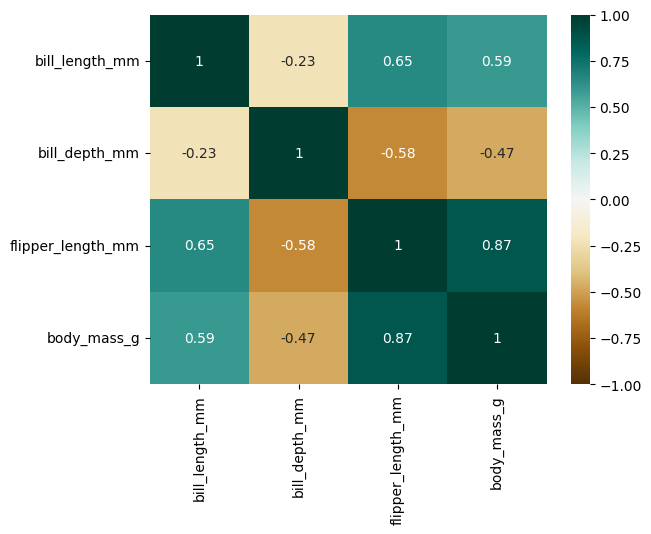

In [3]:
sns.heatmap(
    data=penguins_df.corr(numeric_only=True),
    cmap="BrBG",
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
)
plt.show()

**Creamos un modelo de Regresión Lineal Simple**


In [4]:
x = penguins_df.bill_length_mm #independiente (predictora)
y = penguins_df.body_mass_g #dependiente

model = scipy.stats.linregress(x=x, y=y)
print(model.slope, model.intercept)

86.79175964755545 388.84515876027535


y = b + x * m

In [5]:
# ORDINARY LEAST SQUARES
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()
result.params

,0
const,388.845159
bill_length_mm,86.791760


In [6]:
model_1 = (
    smf.ols(
        data=penguins_df,
        formula="body_mass_g ~ bill_length_mm"
    ).fit()
)
model_1.params

,0
Intercept,388.845159
bill_length_mm,86.791760


**Creamos modelos de Regresión Lineal Múltiple**  

In [7]:
model_2 = (
    smf.ols(
        data=penguins_df,
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm"
    ).fit()
)

In [8]:
model_3 = (
    smf.ols(
        data=penguins_df,
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm"
    ).fit()
)

In [9]:
model_4 = (
    smf.ols(
        data=penguins_df,
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)"
    ).fit()
)

In [10]:
model_5 = (
    smf.ols(
        data=penguins_df,
        formula="body_mass_g ~ flipper_length_mm"
    ).fit()
)

## Realizamos predicciones por cada modelo

In [11]:
model_1_prediccion = model_1.predict(penguins_df)
model_2_prediccion = model_2.predict(penguins_df)
model_3_prediccion = model_3.predict(penguins_df)
model_4_prediccion = model_4.predict(penguins_df)
model_5_prediccion = model_5.predict(penguins_df)

model_1_prediccion

,0
0,3782.402961
1,3817.119665
2,3886.553073
4,3574.102738
5,3799.761313
...,...
338,4485.416214
340,4450.699510
341,4763.149845
342,4311.832695


In [12]:
dic_predicciones = {
    "actual_value": penguins_df.body_mass_g,
    "model_1_prediccion": model_1_prediccion,
    "model_2_prediccion": model_2_prediccion,
    "model_3_prediccion": model_3_prediccion,
    "model_4_prediccion": model_4_prediccion,
    "model_5_prediccion": model_5_prediccion,
}
models_result = pd.DataFrame(dic_predicciones)
models_result

,actual_value,model_1_prediccion,model_2_prediccion,model_3_prediccion,model_4_prediccion,model_5_prediccion
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3205.648453
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3456.414782
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3907.794176
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3807.487644
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3657.027846
...,...,...,...,...,...,...
338,4925.0,4485.416214,4951.159375,4817.401804,4730.939522,4860.706229
340,4850.0,4450.699510,4833.930015,4877.548625,4719.043886,4910.859495
341,5750.0,4763.149845,4899.545411,5269.708799,5402.946434,5261.932356
342,5200.0,4311.832695,4641.476223,4728.911846,4563.248182,4760.399697


In [13]:
sns.set_style(style="whitegrid")

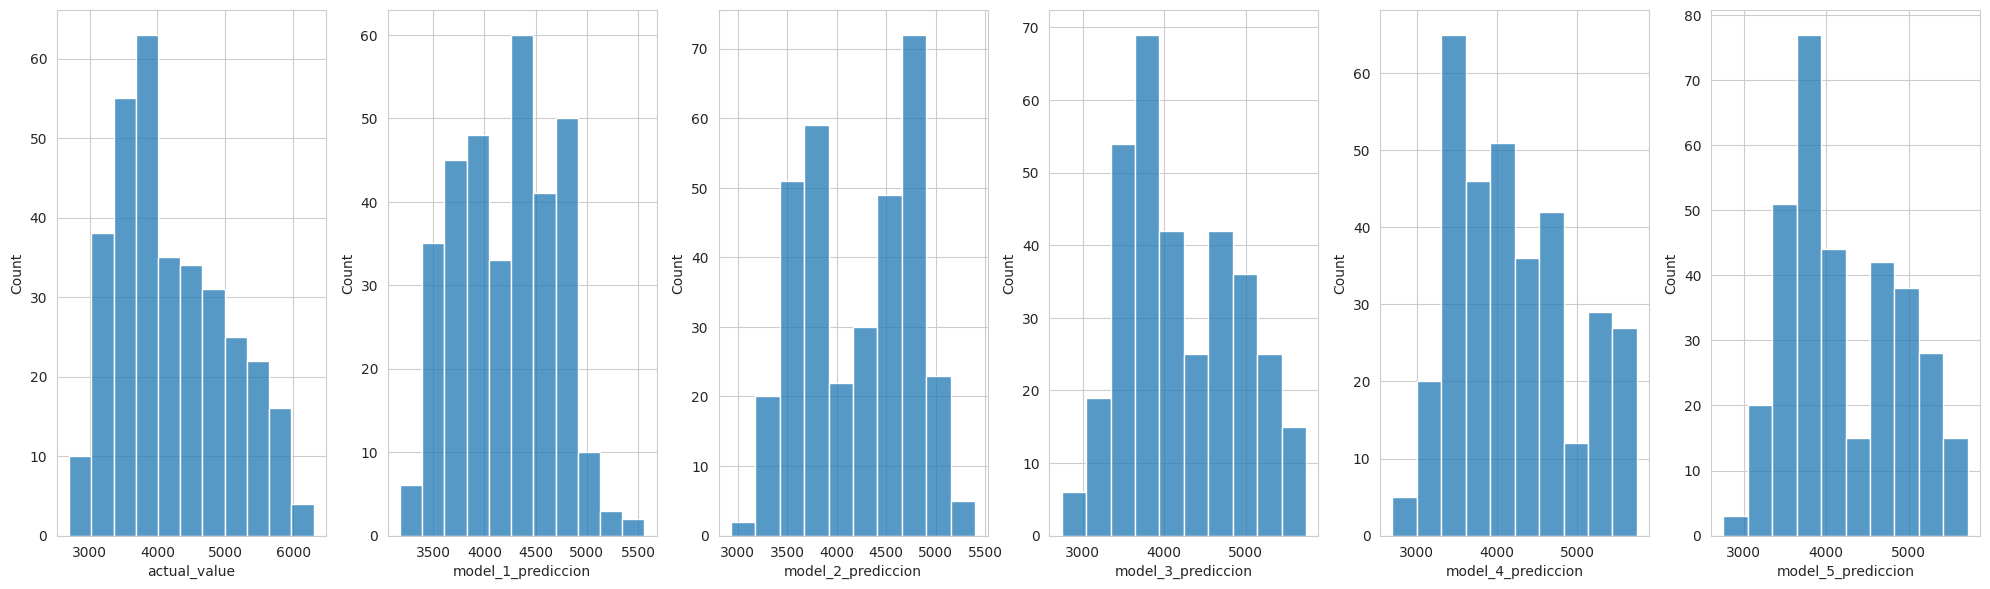

In [14]:
fig, ax = plt.subplots(1,6, figsize=(20,6))

for i, model in enumerate(models_result.columns[0:6]):
  sns.histplot(
      data=models_result,
      x=model,
      ax=ax[i]
  )

fig.tight_layout()
plt.show()

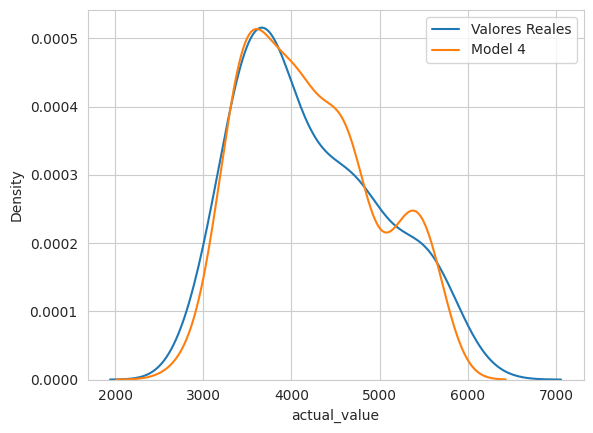

In [15]:
sns.kdeplot(data=models_result, x="actual_value", label="Valores Reales")
sns.kdeplot(data=models_result, x="model_4_prediccion", label="Model 4")
plt.legend()
plt.show()

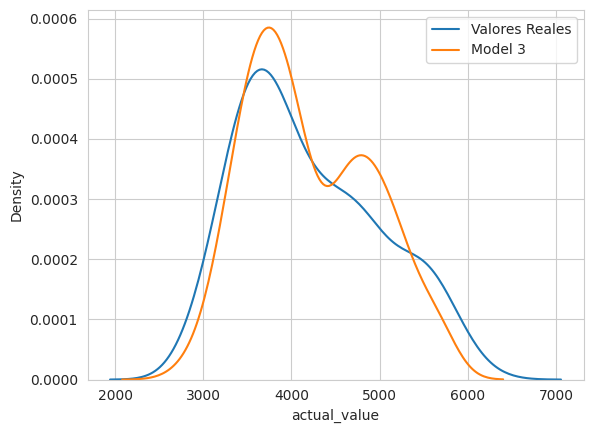

In [16]:
sns.kdeplot(data=models_result, x="actual_value", label="Valores Reales")
sns.kdeplot(data=models_result, x="model_3_prediccion", label="Model 3")
plt.legend()
plt.show()

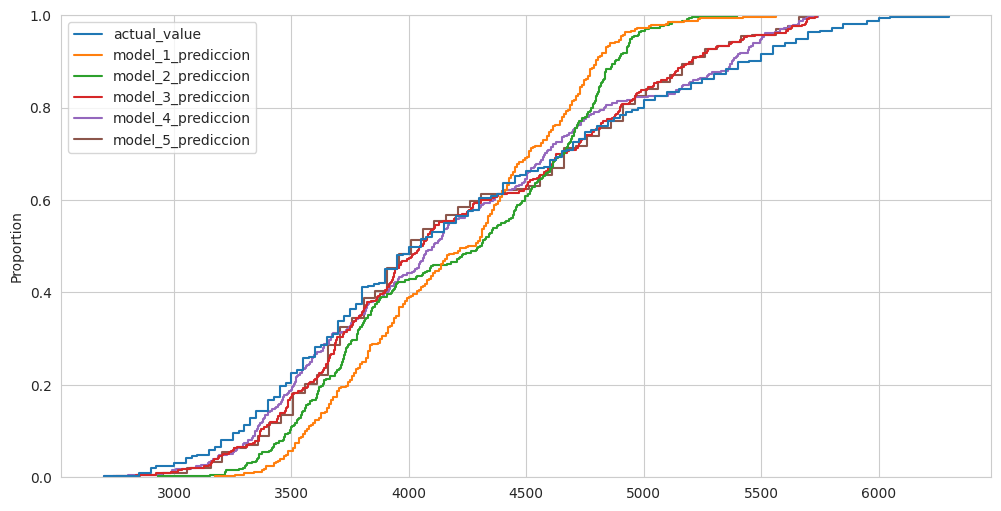

In [17]:
plt.figure(figsize=(12,6))
sns.ecdfplot(data=models_result)
plt.show()

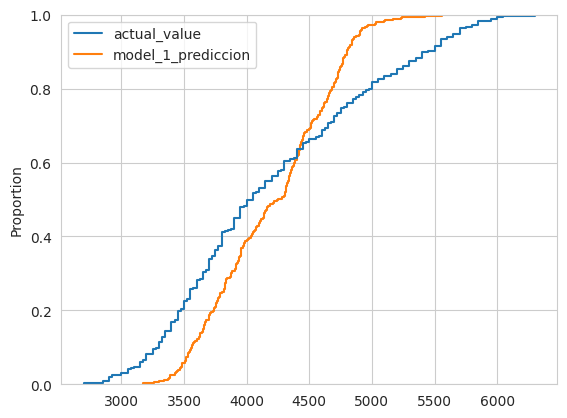

In [18]:
df_model_1_prediccion = models_result[["actual_value", "model_1_prediccion"]]
sns.ecdfplot(data = df_model_1_prediccion)
plt.show()

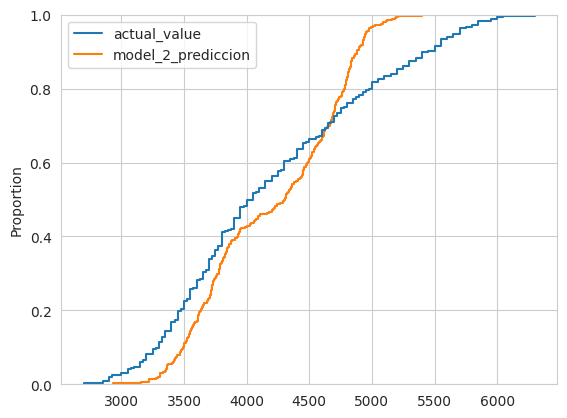

In [19]:
df_model_2_prediccion = models_result[["actual_value", "model_2_prediccion"]]
sns.ecdfplot(data = df_model_2_prediccion)
plt.show()

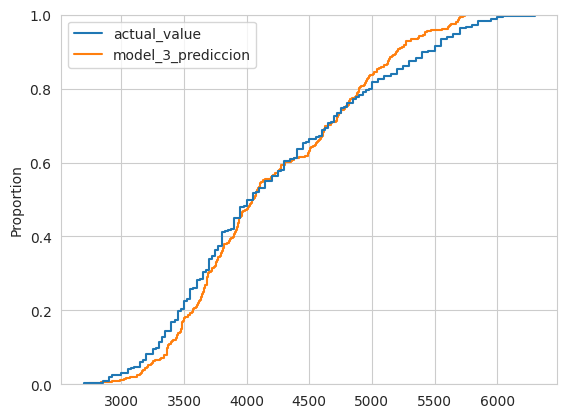

In [20]:
df_model_3_prediccion = models_result[["actual_value", "model_3_prediccion"]]
sns.ecdfplot(data = df_model_3_prediccion)
plt.show()

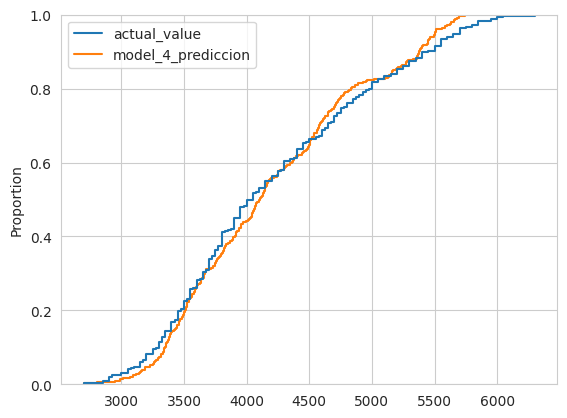

In [21]:
df_model_4_prediccion = models_result[["actual_value", "model_4_prediccion"]]
sns.ecdfplot(data = df_model_4_prediccion)
plt.show()

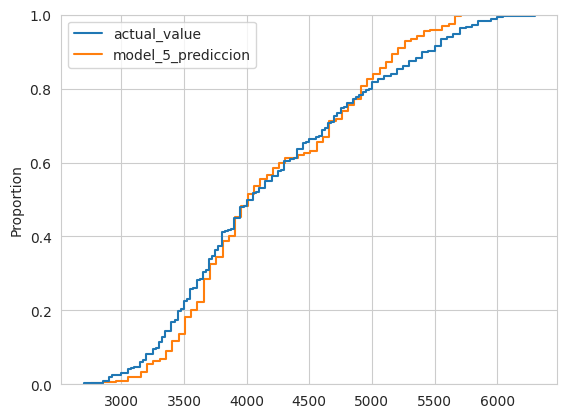

In [22]:
df_model_5_prediccion = models_result[["actual_value", "model_5_prediccion"]]
sns.ecdfplot(data = df_model_5_prediccion)
plt.show()

* MSE = media((Yr-Yp)^2)
* RMSE = sqrt(MSE)

In [23]:
dic_errores = {
    "model_1_rmse": np.sqrt(np.mean((penguins_df.body_mass_g - model_1_prediccion)**2)),
    "model_2_rmse": np.sqrt(np.mean((penguins_df.body_mass_g - model_2_prediccion)**2)),
    "model_3_rmse": np.sqrt(np.mean((penguins_df.body_mass_g - model_3_prediccion)**2)),
    "model_4_rmse": np.sqrt(np.mean((penguins_df.body_mass_g - model_4_prediccion)**2)),
    "model_5_rmse": np.sqrt(np.mean((penguins_df.body_mass_g - model_5_prediccion)**2))
}
dic_errores

{'model_1_rmse': 649.4791928050437,
 'model_2_rmse': 586.7235040689005,
 'model_3_rmse': 390.63708572458495,
 'model_4_rmse': 338.2488501492929,
 'model_5_rmse': 392.16027063806183}

In [24]:
penguins_df.body_mass_g.head()

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
4,3450.0
5,3650.0


In [25]:
model_4_prediccion

,0
0,3579.136946
1,3343.220772
2,3639.137335
4,3457.954243
5,3764.536023
...,...
338,4730.939522
340,4719.043886
341,5402.946434
342,4563.248182


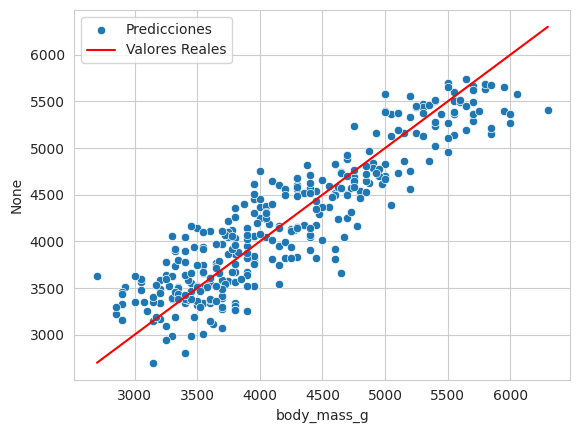

In [29]:
sns.scatterplot(x=penguins_df.body_mass_g, y=model_4_prediccion, label="Predicciones")
sns.lineplot(x=penguins_df.body_mass_g, y=penguins_df.body_mass_g, color="red", label="Valores Reales")
plt.show()

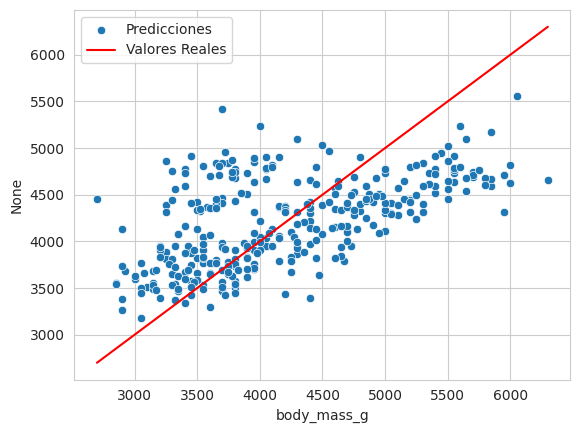

In [ ]:
sns.scatterplot(x=penguins_df.body_mass_g, y=model_1_prediccion, label="Predicciones")
sns.lineplot(x=penguins_df.body_mass_g, y=penguins_df.body_mass_g, color="red", label="Valores Reales")
plt.show()